In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

pd.set_option("display.max_columns", None)
df = pd.read_csv("Student_Performance.csv")
df.drop_duplicates(inplace= True)
df.drop(columns= ["student_id", "final_grade"], inplace= True)
display(df)
binary_cols = ["internet_access", "extra_activities", "school_type"]
binary_map = {"yes": 1, "no": 0, "public": 1, "private": 0}
for col in binary_cols:
    df[col] = df[col].map(binary_map)
encoder = OneHotEncoder(sparse_output= False)
encoded_df = pd.get_dummies(df)
X = encoded_df.drop(columns=["overall_score"])
y = encoded_df[["overall_score"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
y_train_array, y_test_array = y_train["overall_score"].values, y_test["overall_score"].values
rf_model = RandomForestRegressor(n_estimators= 300, max_depth= None, min_samples_split= 5, random_state= 42, n_jobs= -1)
rf_model.fit(X_train, y_train_array)
preds = rf_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, preds))
print("R2:", r2_score(y_test, preds))

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1
1,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3
2,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6
3,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6
4,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,17,male,private,graduate,1.8,53.2,yes,15-30 min,no,group study,37.1,37.1,26.8,38.4
14996,17,other,private,diploma,6.7,63.5,no,<15 min,yes,mixed,84.4,67.2,96.2,78.8
14997,17,male,private,phd,5.2,58.2,yes,30-60 min,no,group study,69.0,57.2,74.1,64.3
14998,16,other,private,graduate,1.0,68.7,yes,30-60 min,yes,textbook,24.2,41.4,30.5,33.6


RMSE:  17.60372310733461
R2: 0.9523270737189108


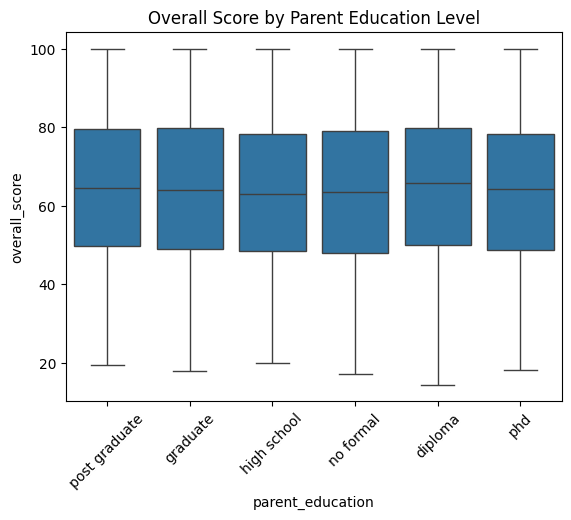

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(x= "parent_education", y="overall_score", data=df)
plt.xticks(rotation= 45)
plt.title("Overall Score by Parent Education Level")
plt.show()


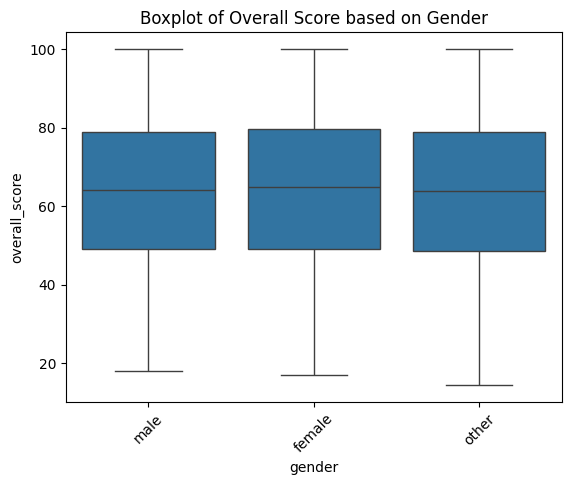

In [34]:
sns.boxplot(x= "gender", y="overall_score", data=df)
plt.xticks(rotation= 45)
plt.title("Boxplot of Overall Score based on Gender")
plt.show()

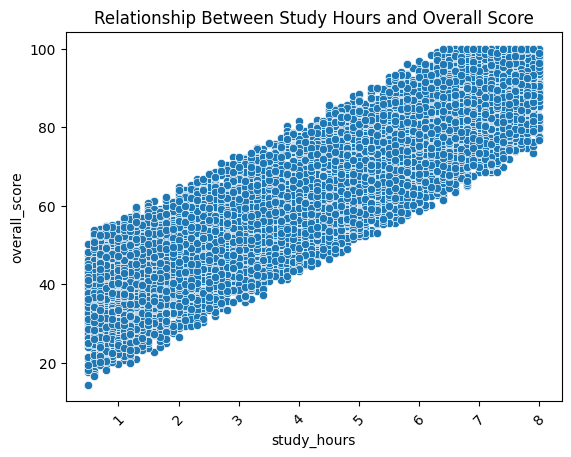

In [35]:
sns.scatterplot(x="study_hours", y="overall_score", data= df)
plt.xticks(rotation= 45)
plt.title("Relationship Between Study Hours and Overall Score")
plt.show()

In [36]:
import ipywidgets as widgets
age_widget = widgets.FloatText(value= 0, description= "Student Age")
gender_widget = widgets.Dropdown(options= ["Male", "Female", "Other"], description= "Student Gender")
school_type_widget = widgets.Dropdown(options= ["Public", "Private"], description= "School Type")
parent_ed_widget = widgets.Dropdown(options= ["No Formal", "High School", "Diploma", "Graduate", "Post Graduate", "PhD"], description= "Education Level of Student's Parent")
study_hours_widget = widgets.FloatText(value= 0, description= "Weekly Study Hours")
attendance_widget = widgets.FloatText(value= 0, description= "Attendance Percentage")
internet_widget = widgets.Dropdown(options= ["Yes", "No"], description= "Internet Access at Home")
travel_widget = widgets.Dropdown(options= ["<15 Min", "15-30 Min", "30-60 Min", ">60 Min"], description= "Travel Time to School")
activities_widget = widgets.Dropdown(options= ["Yes", "No"], description= "Participates in Extra Curricular Activities")
study_method_widget = widgets.Dropdown(options= ["Notes", "Textbook", "Group Study", "Coaching", "Mixed", "Online Videos"], description= "Preferred Study Method of Student")
math_widget = widgets.FloatText(value= 0, description= "Most Recent Math Score")
science_widget = widgets.FloatText(value= 0, description= "Most Recent Science Score")
english_widget = widgets.FloatText(value= 0, description= "Most Recent English Score")
display(X_train)

predict_button = widgets.Button(description= "Predict", button_style= "success")
output_label = widgets.Label(value= "Predicted Overall Score will appear here")
debug_view = widgets.Output(layout={"border": "1px solid black"})
@debug_view.capture(clear_output=True)
def predict(b):
    input_data = pd.DataFrame([[
        age_widget.value,
        0,
        study_hours_widget.value,
        attendance_widget.value,
        0,
        0,
        math_widget.value,
        science_widget.value,
        english_widget.value,
        False, #Female
        False, #Male
        False, #Other
        False, #Diploma
        False, #Graduate
        False, #High School
        False, #No Formal
        False, #PhD
        False, #Post Graduate
        False, #15-30
        False, #30-60
        False, #<15
        False, #>60
        False, #Coaching
        False, #Group Study
        False, #Mixed
        False, #Notes
        False, #Videos
        False #Textbook
    ]])
    match gender_widget.value:
        case "Male":
            input_data.iloc[0, 10] = True
        case "Female":
            input_data.iloc[0, 9] = True
        case "Other":
            input_data.iloc[0, 11] = True
    match school_type_widget.value:
        case "Public":
            input_data.iloc[0, 1] = 1
        case "Private":
            input_data.iloc[0, 1] = 0
    match parent_ed_widget.value:
        case "No Formal":
            input_data.iloc[0, 15] = True
        case "High School":
            input_data.iloc[0, 14] = True
        case "Diploma":
            input_data.iloc[0, 12] = True
        case "Graduate":
            input_data.iloc[0, 13] = True
        case "Post Graduate":
            input_data.iloc[0, 17] = True
        case "PhD":
            input_data.iloc[0, 16] = True
    match internet_widget.value:
        case "Yes":
            input_data.iloc[0, 4] = 1
        case "No":
            input_data.iloc[0, 4] = 0
    match activities_widget.value:
        case "Yes":
            input_data.iloc[0, 5] = 1
        case "No":
            input_data.iloc[0, 5] = 0
    match study_method_widget.value:
        case "Notes":
            input_data.iloc[0, 25] = True
        case "Textbook":
            input_data.iloc[0, 27] = True
        case "Group Study":
            input_data.iloc[0, 23] = True
        case "Coaching":
            input_data.iloc[0, 22] = True
        case "Mixed":
            input_data.iloc[0, 24] = True
        case "Online Videos":
            input_data.iloc[0, 26] = True
    match travel_widget.value:
        case "<15 Min":
            input_data.iloc[0, 20] = True
        case "15-30 Min":
            input_data.iloc[0, 18] = True
        case "30-60 Min":
            input_data.iloc[0, 19] = True
        case ">60 Min":
            input_data.iloc[0, 21] = True

    prediction = rf_model.predict(input_data)

    output_label.value = f"Predicted Overall Score: {prediction[0]:.2f}"

predict_button.on_click(predict)

vb = widgets.VBox([
    age_widget,
    gender_widget,
    school_type_widget,
    parent_ed_widget,
    study_hours_widget,
    attendance_widget,
    internet_widget,
    travel_widget,
    activities_widget,
    study_method_widget,
    math_widget,
    science_widget,
    english_widget,
    predict_button,
    output_label,
])

display(vb)

,age,school_type,study_hours,attendance_percentage,internet_access,extra_activities,math_score,science_score,english_score,gender_female,gender_male,gender_other,parent_education_diploma,parent_education_graduate,parent_education_high school,parent_education_no formal,parent_education_phd,parent_education_post graduate,travel_time_15-30 min,travel_time_30-60 min,travel_time_<15 min,travel_time_>60 min,study_method_coaching,study_method_group study,study_method_mixed,study_method_notes,study_method_online videos,study_method_textbook
9839,16,0,1.6,73.5,1,0,59.1,57.7,53.0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
9680,14,1,7.6,89.6,1,0,100.0,86.5,100.0,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
7093,16,1,0.8,60.6,1,0,20.9,39.8,41.2,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
11293,17,0,6.2,63.3,1,0,64.2,68.1,71.4,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
820,14,1,7.5,89.9,1,1,91.5,88.9,89.1,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,19,1,4.9,67.6,1,0,78.5,83.9,63.5,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
13418,16,0,0.7,51.4,1,1,59.4,23.5,24.6,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False
5390,15,0,1.9,62.4,1,1,36.0,32.7,28.6,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
860,19,1,0.8,98.3,0,0,54.3,45.4,51.5,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
